<a href="https://colab.research.google.com/github/AunAli6783/python-/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

'2.6.0+cu124'

In [ ]:
weight =10
bais = 20

start=0
end =10
step=0.5

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight* X + bais

X , y

(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000],
         [5.0000],
         [5.5000],
         [6.0000],
         [6.5000],
         [7.0000],
         [7.5000],
         [8.0000],
         [8.5000],
         [9.0000],
         [9.5000]]),
 tensor([[ 20.],
         [ 25.],
         [ 30.],
         [ 35.],
         [ 40.],
         [ 45.],
         [ 50.],
         [ 55.],
         [ 60.],
         [ 65.],
         [ 70.],
         [ 75.],
         [ 80.],
         [ 85.],
         [ 90.],
         [ 95.],
         [100.],
         [105.],
         [110.],
         [115.]]))

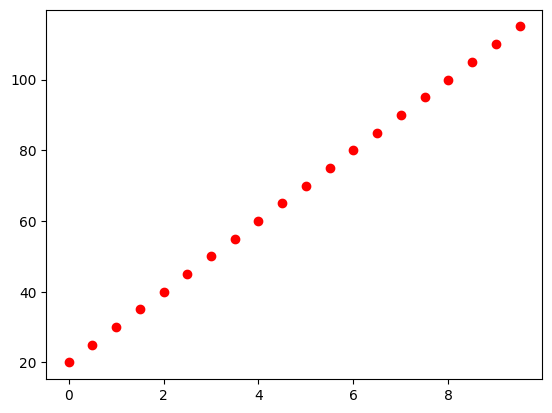

In [ ]:
plt.scatter(X,y, c='r')


In [ ]:
len(X)

20

In [ ]:
t= int (0.8 * len(X))
train= X[: t]
test=X[t:]
train , test

(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000],
         [5.0000],
         [5.5000],
         [6.0000],
         [6.5000],
         [7.0000],
         [7.5000]]),
 tensor([[8.0000],
         [8.5000],
         [9.0000],
         [9.5000]]))

In [ ]:
len(train) , len(test)

(16, 4)

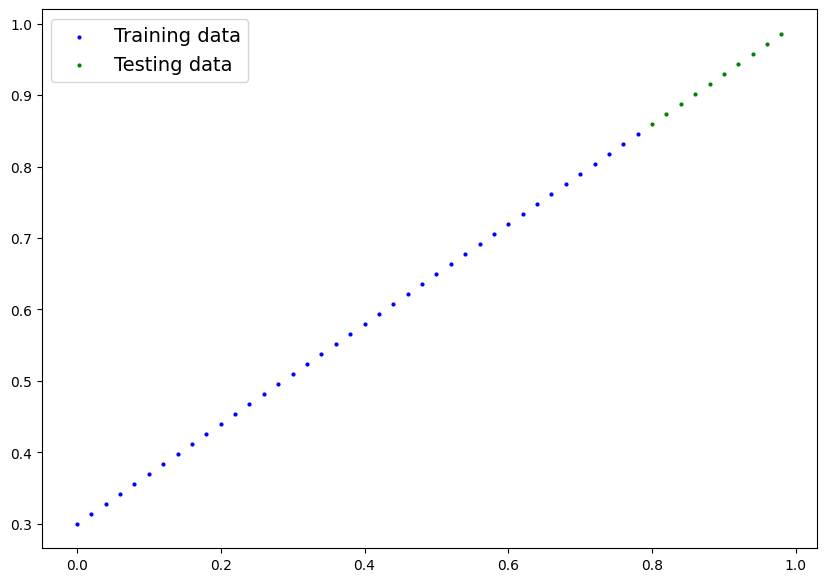

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


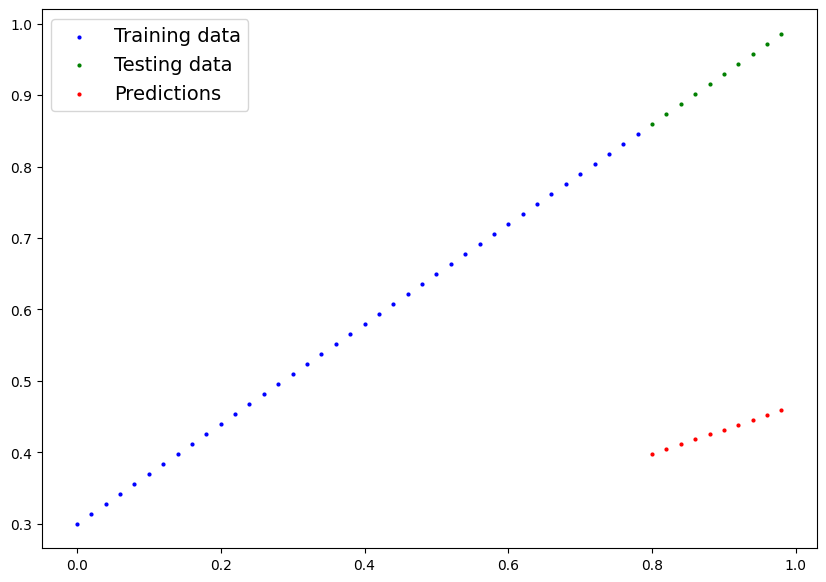

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
from sklearn.datasets import make_circles

x,y =make_circles(n_samples=1000,noise=0.2,random_state=42)

In [ ]:
x, y , x.shape , y.shape

(array([[ 0.65191158,  0.36072342],
        [-0.56808293,  0.28443736],
        [-0.93835958,  0.5870362 ],
        ...,
        [-0.06320711, -0.94704331],
        [ 0.58997682, -0.9858547 ],
        [ 0.25860186,  0.99387275]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

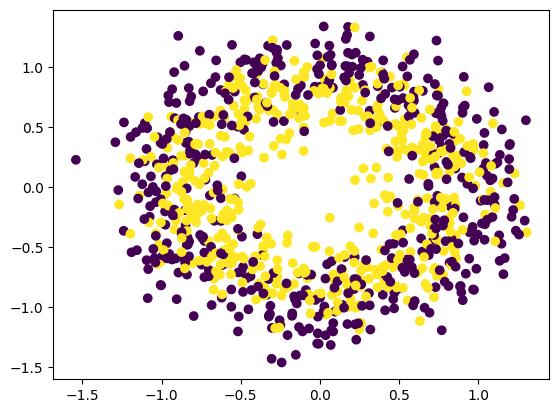

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y)

In [ ]:
import pandas as pd
circle=pd.DataFrame({'x1':x[:,0],
              'x2':x[:,1],
              'y':y})

In [ ]:
circle

,x1,x2,y
0,0.651912,0.360723,1
1,-0.568083,0.284437,1
2,-0.938360,0.587036,1
3,-0.694672,0.517336,1
4,0.471062,-0.881526,0
...,...,...,...
995,0.286866,0.788255,0
996,-1.035729,-0.406579,0
997,-0.063207,-0.947043,1
998,0.589977,-0.985855,0


In [ ]:
circle.y.value_counts()

,count
y,
1,500
0,500


In [ ]:
x.dtype , y.dtype

(dtype('float64'), torch.float32)

In [ ]:
y

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [ ]:
import torch

X=torch.from_numpy(x).type(torch.float)

X

tensor([[ 0.6519,  0.3607],
        [-0.5681,  0.2844],
        [-0.9384,  0.5870],
        ...,
        [-0.0632, -0.9470],
        [ 0.5900, -0.9859],
        [ 0.2586,  0.9939]])

In [ ]:
X.dtype , y.dtype

(torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

len(x_train) , len(x_test) , len(y_test) , len(y_train)

(800, 200, 200, 800)

In [ ]:
from torch import nn
device ='cude' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class circlemoel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=1)

  def forward(self,X):
    return self.layer2(self.layer1(x))


model_0=circlemoel().to(device)
model_0


circlemoel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5802, -0.5491],
                      [ 0.4068, -0.1919],
                      [-0.0830, -0.1357],
                      [-0.7057,  0.4005],
                      [ 0.3664,  0.0934],
                      [ 0.3710, -0.3788],
                      [-0.4691, -0.2053],
                      [-0.1072,  0.4117],
                      [-0.3931, -0.6831],
                      [-0.5113, -0.5950]])),
             ('layer1.bias',
              tensor([-0.5459, -0.3095, -0.0958, -0.2195, -0.0035,  0.1983, -0.1507, -0.4051,
                      -0.5652, -0.5471])),
             ('layer2.weight',
              tensor([[-0.0317, -0.0400, -0.2363, -0.2156, -0.2388,  0.0847, -0.1809, -0.0164,
                        0.2579, -0.0708]])),
             ('layer2.bias', tensor([-0.0282]))])

In [ ]:
model_1=nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)